# **Data Visualization with Python**

# Part 3 Pie_Box_Subplot_Scatter_Bubble

#### Author: Avery Jan

#### Date: 9-25-2022

# Overview

This part of the project uses the same Canada Immigration Dataset as in Part 1 and Part 2 to create Pie Charts, Box Plots, Subplots, and Scatter Plots, and Bubble Plots. After the dataset is downloaded and read into a pandas dataframe, a six-step data preparation procedure is used to prepare the data for creating visualizations in this part. The visualizations generated are:  
1. Pie Chart for Immigration to Canada by Continent 1980-2013
2. Box Plot for Japan, Box Plot for India and China, and Box Plot for Immigration from top 15 countries for decades 80s, 90s and 2000s
3. Subplots (Box Plot, Line Plots) for India and China
4. Scatter Plot for Total Immigration to Canada from 1980 - 2013
5. Bubble Plot for Immigration from Brazil and Argentina from 1980 to 2013

# The Dataset: Immigration to Canada from 1980 to 2013 <a id="0"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous/next residence both for foreigners and nationals. This version of the dataset presents data pertaining to 45 countries of destination.

This part of the project uses the Canada subset that includes data on immigration to Canada from 1980 to 2013.
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx
<br>

***
# Downloading Data <a id="2"></a>


In [1]:
# Install openpyxl (formerly xlrd), a module that pandas requires to read Excel files.
import piplite
await piplite.install(['openpyxl==3.0.9'])

In [2]:
# Import primary modules.
import numpy as np  
import pandas as pd

In [3]:
# Download the Canadian Immigration dataset and read it into a pandas dataframe.

from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())

df_can = pd.read_excel(
    text,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
# View the first five rows of data. 
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# Print the dimensions of the dataframe.
print(df_can.shape)

(195, 43)


***
# Preparing Data <a id="2"></a>


In [6]:
# Step 1: Remove unnecessary columns.
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Step 2: Rename some of the columns to meaningful names. 
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Step 3: Make all column labels of type string for consistency.
df_can.columns = list(map(str, df_can.columns))

# Step 4: Set the country name as index for looking up countries using .loc method.
df_can.set_index('Country', inplace=True)

# Step 5: Add a column 'Total.'
df_can['Total'] = df_can.sum(axis=1)

# Step 6: Create a list of the labels of all 'year' columns years to faciltate the plotting of visualizations. 
years = list(map(str, range(1980, 2014)))

# Print the dimension of the modified dataframe. 
print('data dimensions:', df_can.shape)

<ipython-input-6-a9cb642eba2d>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


data dimensions: (195, 38)


***
# Visualizing Data using Matplotlib<a id="4"></a>


In [7]:
# Use the inline backend to generate the plots within the browser.
%matplotlib inline

# Import Matplotlib.
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set the style of plots.
mpl.style.use('ggplot') 

# Check for latest version of Matplotlib.
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.1


# 1. Pie Charts <a id="6"></a>

In [8]:
# Goal: Create a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the time period from 1980 to 2013.

# Step 1: Group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# Note: the output of the groupby method is a `groupby' object. So, apply a function (eg .sum()) to use it further.
print(type(df_can.groupby('Continent', axis=0)))

# View the first five rows of the new dataframe that reflects the grouping of countries by continents.
df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


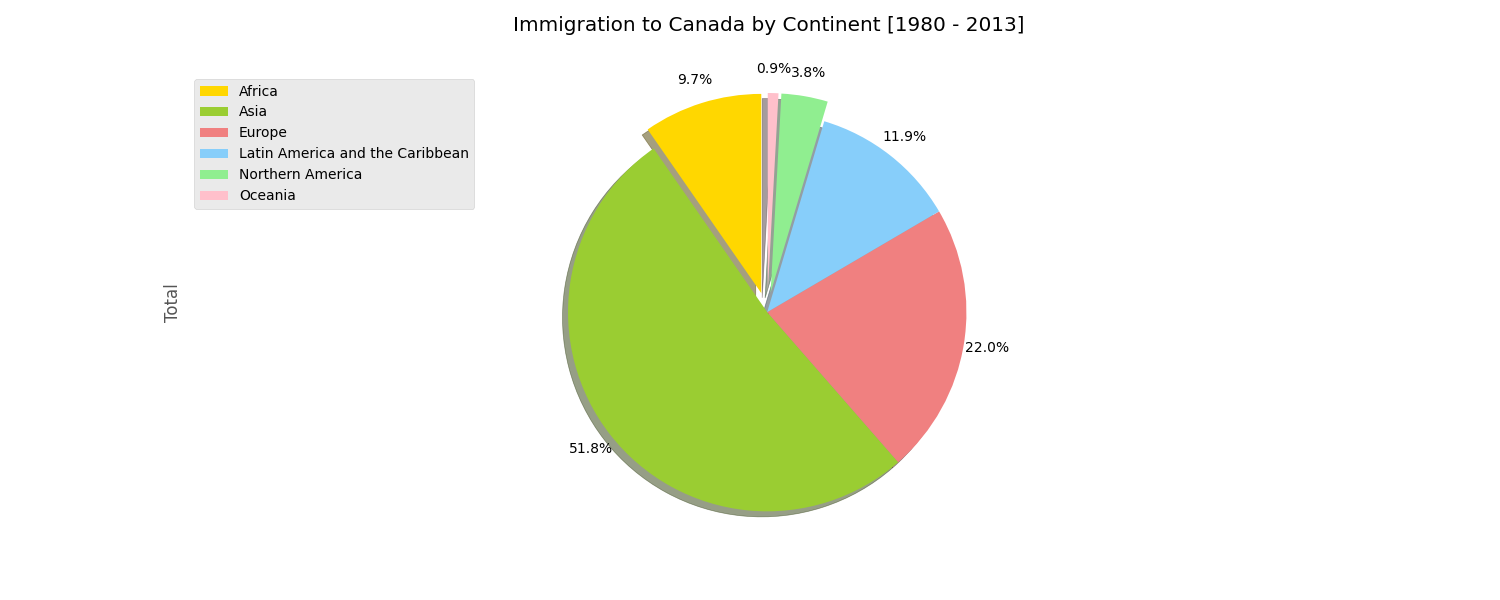

<Figure size 1500x600 with 0 Axes>

In [9]:
# Step 2: Create two lists, one for the colors of the wedges and the other for the ratio with which to offset each wedge. 
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # Ratio for each continent with which to offset each wedge.

# Step 3: Create a pie chart.  

# The parameter 'autopct' creates % labels for the wedges of the pie chart.
# The parameter 'start angle' rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
# The Parameter 'shadow' draws a shadow beneath the pie (to give a 3D feel).

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',   # Create the percentage text labels (to the tenth place) for each wedge.
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # Turn off labels that appear on the wedges of the pie chart.
                            pctdistance=1.12,    # The ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # Add custom colors
                            explode=explode_list # 'Explode' lowest 3 continents 
                            )

# Step 4: Scale the title up by 7% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.07) 

# Step 5: Sets the shape of the pie chart to look like a circle.
plt.axis('equal') 

# Step 6: Add a legend
plt.legend(labels=df_continents.index, loc='upper left') 

# Display the pie chart.
plt.show()

# 2. Box Plots <a id="8"></a>

## (a) Japanese immigrants (1980 - 2013)

In [10]:
# Goal: Create a box plot for Japanese immigrants between 1980 - 2013.

# Step 1: Get the data by placing extra square brackets around 'Japan' to get a dataframe, and transpose that dataframe. 
df_japan = df_can.loc[['Japan'], years].transpose()

# View the first five rows of data in the new dataframe. 
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


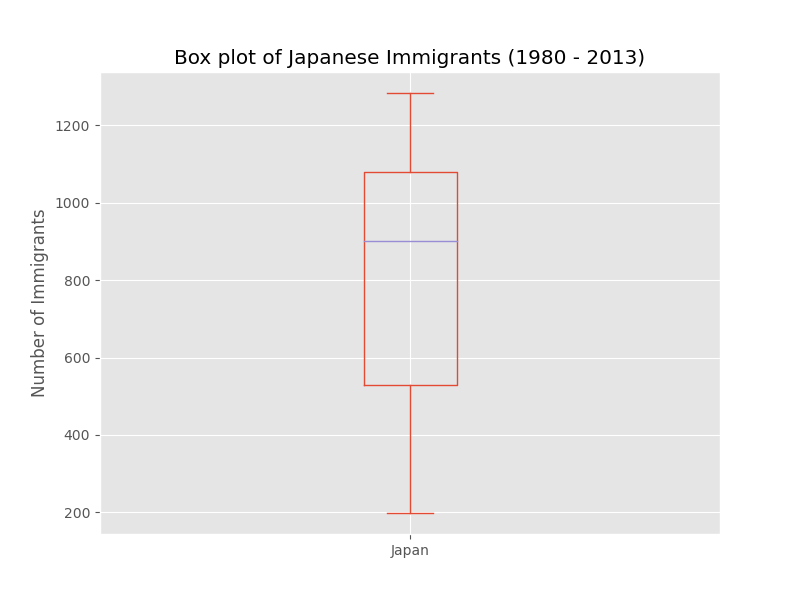

<Figure size 800x600 with 0 Axes>

In [11]:
# Step 2: Create a box plot. 
df_japan.plot(kind='box', figsize=(8, 6))

# Step 3: Add a title and a label for y-axis. 
plt.title('Box plot of Japanese Immigrants (1980 - 2013)')
plt.ylabel('Number of Immigrants')

# Step 4: Display the box plot. 
plt.show()

<br>
<br>

### Key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).
<br>
<br>

In [12]:
# View the actual numbers for each dimension shown in the box plot. 
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


<br>

## (b) Immigrants from China and India (1980 - 2013)

In [13]:
# Goal: Create two boxplots to compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

# Step 1: Get the data of China and India (dataframe df_CI) and transpose the dataframe. 
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [14]:
# View the statistical summary associated with both countries.
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


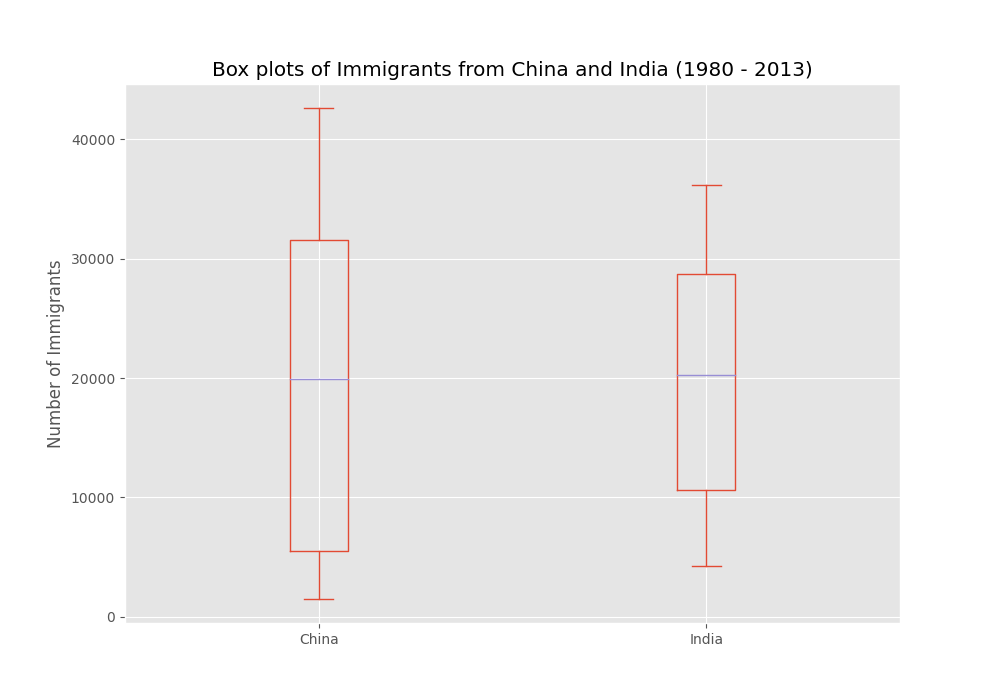

<Figure size 1000x700 with 0 Axes>

In [15]:
# Step 2: Create two boxplots, one for China and the other for India, on the same plot. 
df_CI.plot(kind='box', figsize=(10, 7))

# Step 3: Add a title and a label for the y-axis.
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

# Step 4: Display the plot. 
plt.show()

<br>
<br>

### An observation from the above plot:

While both countries have about the same median immigrant population (~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is about 15% lower than the maximum population from China (42,584).
<br>
<br>

## (c) Immigration from top 15 countries for decades 80s, 90s, and 2000s

In [16]:
# Goal: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) 
## grouped by the decades 1980s, 1990s, and 2000s.

# Step 1: Get the data of the top 15 countries based on Total immigrant population and name the resulting dataframe df_top15.
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [17]:
# Step 2: Create a new dataframe which contains the aggregate for each decade.

# Create a list of all years in decades 80's, 90's, and 00's.
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# Slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# Merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# Display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [18]:
# Get the statistics associated with the dataframe new_df.
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


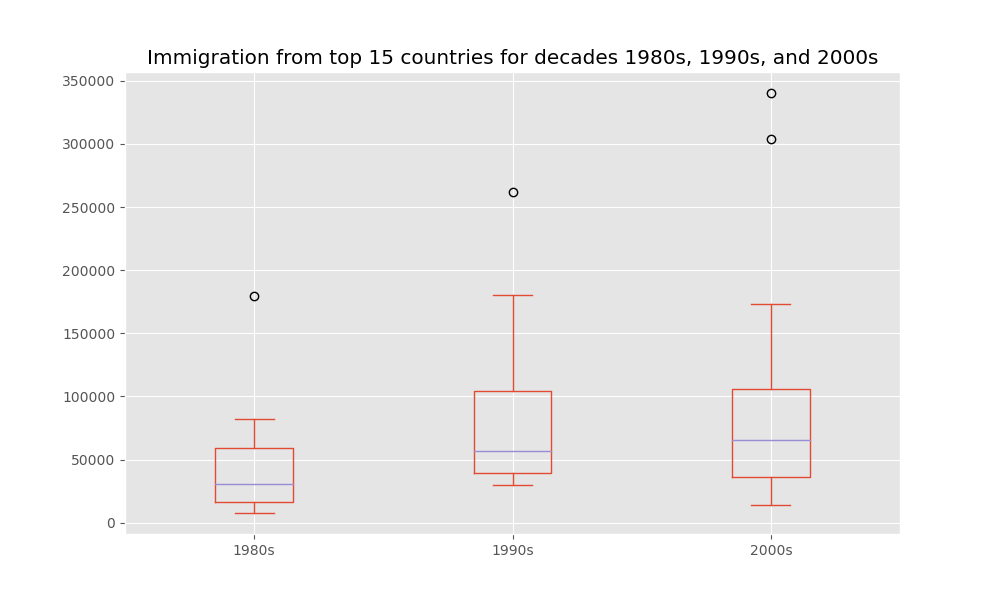

<Figure size 1000x600 with 0 Axes>

In [19]:
# Step 3: Plot the box plots.
new_df.plot(kind='box', figsize=(10, 6))

# Step 4: Add a title. 
plt.title('Immigration from top 15 countries for decades 1980s, 1990s, and 2000s')

# Step 5: Display the box plots. 
plt.show()

In [20]:
# Check how many entries fall above the outlier threshold (any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier).

## In the decade of 2000s, IQR = 105,505.5 - 36,101.5 = 69,404 
## Outlier > 105,505.5 + (1.5 * 69,404)
## Outlier > 209,611.5

new_df[new_df['2000s']> 209611.5]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


<br>

### An Observation from the dataframe above

China and India are both considered as outliers in 2000s since their population for the decade exceeds 209,611.5. However, neither is the outlier in the 1980s or 1990s. 
<br>
<br>

# 3. Subplots

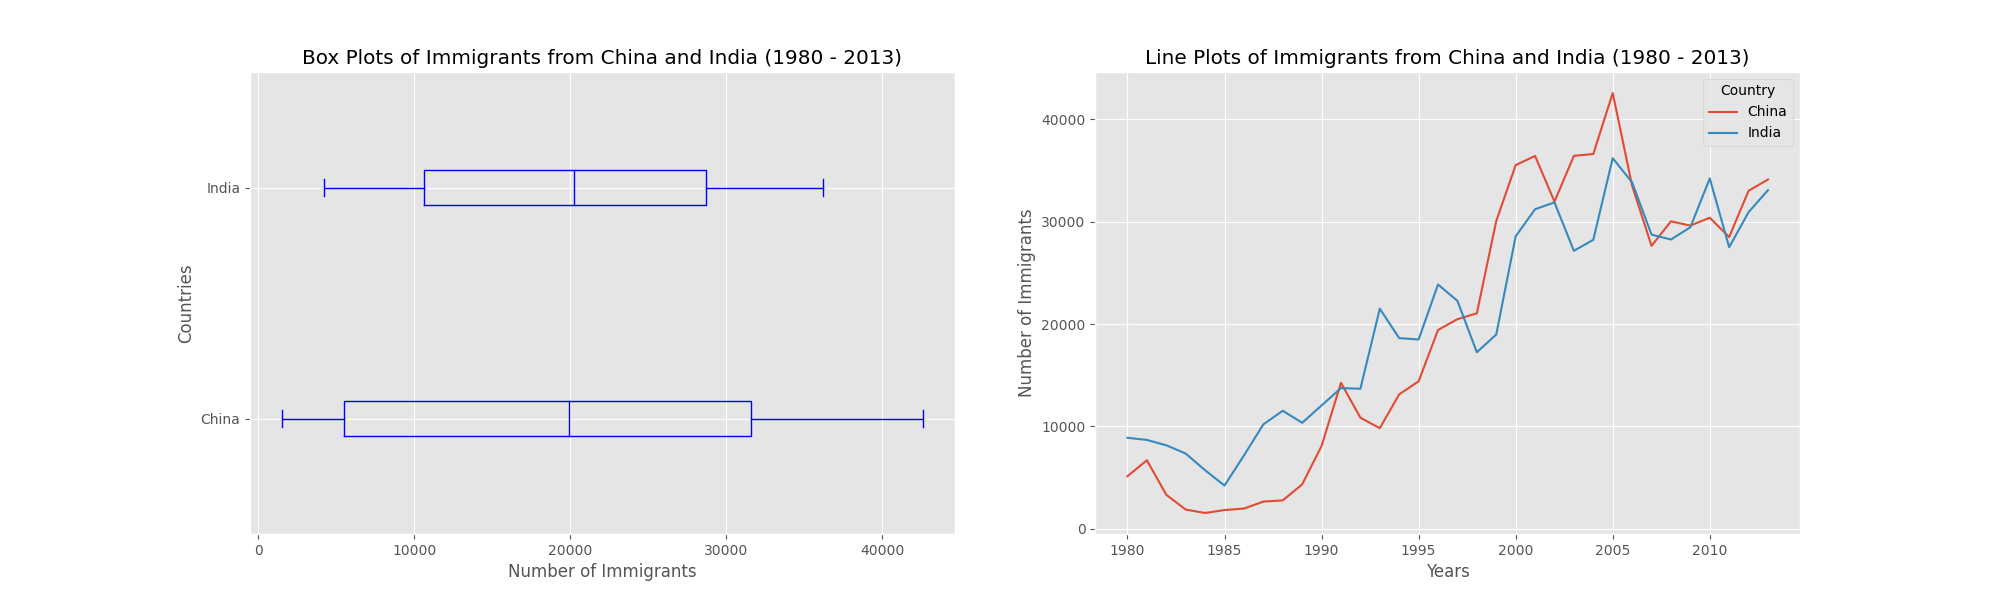

<Figure size 2000x600 with 0 Axes>

In [21]:
# Goal: Create subplots to compare box plots and line plots of China and India side by side (object oriented code).

# Step 1: Create a figure object.
fig = plt.figure() 

# Step 2: Specify how the two subplots are laid out on the figure whose canvas is divided into  a 1 rows by 2 columns notional grid.
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot).

# Step 3: Create the plots and specify which subplot to place each plot by passing in the ax paramemter in plot() method.

## Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

## Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

# Step 4: Display the subplots.
plt.show()

<br>
<br>

# 4. Scatter Plots <a id="10"></a>

In [22]:
# Goal: Create a scatter plot to visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

# Step 1: Use the sum() method to get the total population per year.
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# Step 2: Preparing the data for creating a scatter plot.

## 'years' (in string type) are converted to int type so that the relationship betewen years and total population (int type) can be determined.
df_tot.index = map(int, df_tot.index)

## Reset the index to put it back in as a column in the df_tot dataframe.
df_tot.reset_index(inplace = True)

## Rename columns.
df_tot.columns = ['year', 'total']

## View the final dataframe.
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


[slope, intercept] of equation of line of best fit:  [ 5.56709228e+03 -1.09261952e+07]


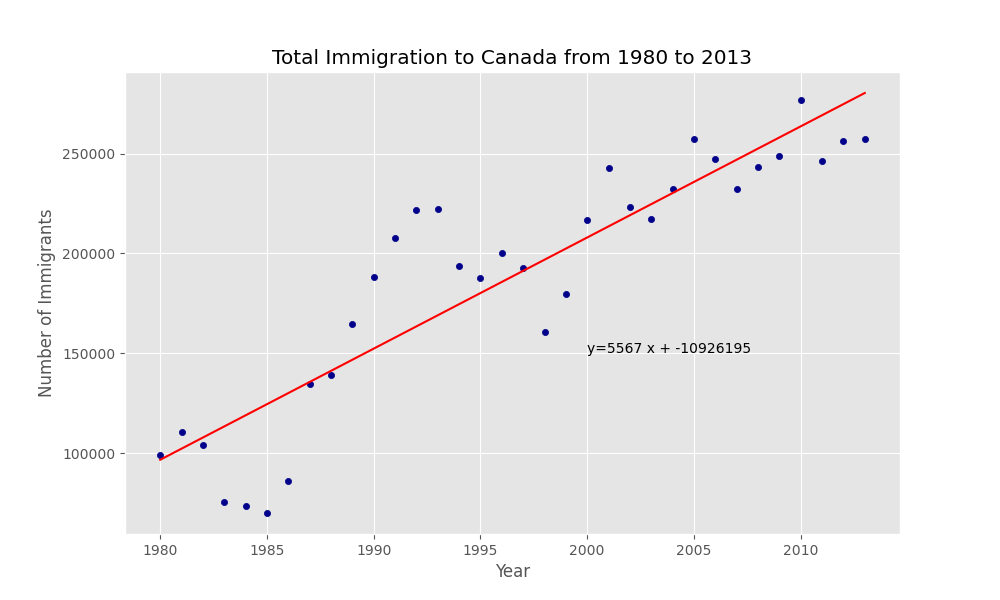

'No. Immigrants = 5567 * Year + -10926195'

<Figure size 1000x600 with 0 Axes>

In [23]:
# Step 3: Create a scatter plot.

## Create the scatter plot.
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

## Add a title and axes labels. 
plt.title('Total Immigration to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Step 4: Get the equation of line of best fit. 
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1) # deg = 1, meaning fitting a line. 

## The output of np.polyfit() is an array with the polynomial coefficients, highest powers first. 
## So, in this case, the array has 2 elements: the slope in position 0 and intercept in position 1.

print('[slope, intercept] of equation of line of best fit: ', fit)

# Step 5: Plot line of best fit (a linear regression line) and annotate the plot with the linear regression equation. 
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

# Step 6: Display the plot.
plt.show()

# Step 7: Print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

<br>
<br>

## Compare the estimated and actual number of immigrants in 2015.

**Using the equation of line of best fit to estimate the number of immigrants in 2015**

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

According to the actual value from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), Canada accepted 271,845 immigrants in 2015. 
The estimated value of 291,310 is within 7% of the actual number, which is rather good considering the fact that the data used to derive the line of best fit came from United Nations, which might differ slightly from CIC data.
<br>

## An observation from the scatter plot 

The scatter plot above shows that immigration to Canada took a dip around 1993 - 1997. An analysis made following the creation of this scatter plot reveals that in 1993, Canada introduced Bill C-86, which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years. These changes in the Canada Immigration legislations are the reasons behind the large drop in the immigration flow around 1993 - 1997. 
<br>
<br>

# 5. Bubble Plots <a id="12"></a>

## A Case Study: Argentina's great depression and Brazil's financial crisis in 1999

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

On a similar note, its neighboring country, Brazil, suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years. 

In this study, bubble plots of these two countries are used to analyze the effects of their respective financial crises on immigration from these countries to Canada. 
<br>
<br>

In [24]:
# Goal: Use bubble plots of Argentina and Brazil to analyze the effects of their financial crises on their immigration to Canada.

# Step 1: Change the dataframe such that it has a 'Year' column in type int.

## Transposed dataframe.
df_can_t = df_can[years].transpose()

## Cast the Years (the index) to type int.
df_can_t.index = map(int, df_can_t.index)

## label the index. This will automatically be the column name when resetting the index.
df_can_t.index.name = 'Year'

# Reset index to bring the Year column in as a column.
df_can_t.reset_index(inplace=True)

# View the changes.
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [25]:
# Step 2: Create weights of Argentina and Brazil data (normalizing these data) by using feature scaling to bring all values into the range [0, 1].

## Normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

## Normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

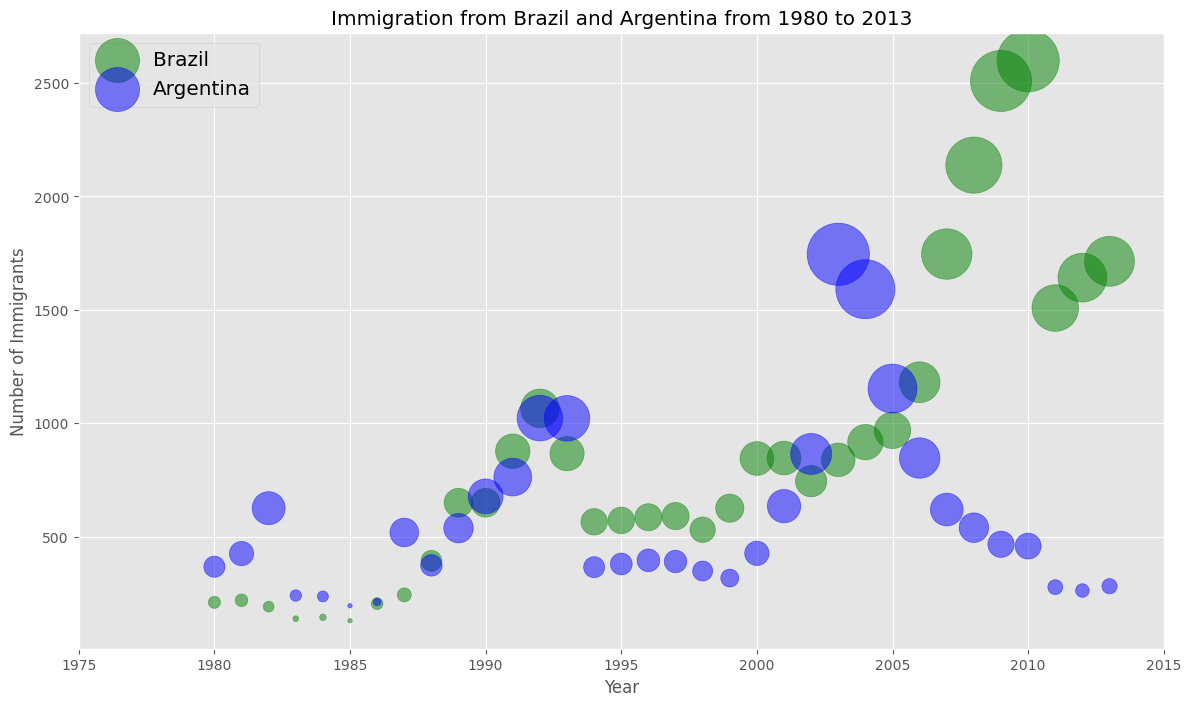

In [26]:
# Step 3: Create the bubble plots. 

## Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

## Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

## Add a title, y-axis label, and a legend. 
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

### Observations from the bubble plots

The size of the bubble corresponds to the magnitude of the immigrating population for that year. The larger the bubble is, the more immigrants are in that year. On the Argentina bubble plot, immigration from Argentina increased sharply during its 1998 - 2002 great depression. Similarly, on the Brazil bubble plot, immigration from Brazil increased rapidly after the Samba effect (1999) occurred. Then, the immigration outflows continued to climb for a decade until 2010. In both cases, the immigration data do reflect these financial events.